In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb

print(plt.style.available)
plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = 8, 4

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-bright', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [3]:
from pymongo import MongoClient

def get_mongo_database(db_name, host='localhost', port=27017, username=None, password=None):
    '''Get (or create) named database from MongoDB with/out authentication'''
    if username and password:
        mongo_uri = 'mongodb://{}:{}@{}/{}'.format(username, password, host, db_name)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)
    return conn[db_name]

def mongo_to_dataframe(db_name, collection_name, query={}, host='localhost',
                       port=27017, username=None, password=None, no_id=True):
    '''Create a Pandas DataFrame from MongoDB collection'''
    db = get_mongo_database(db_name, host, port, username, password)
    cursor = db[collection_name].find(query)
    df = pd.DataFrame(list(cursor))
    if no_id:
        del df['_id']
    return df

def dataframe_to_mongo(dframe, db_name, collection_name, host='localhost',
                 port=27017, username=None, password=None):
    '''save a dataframe to mongodb collection'''
    db = get_mongo_database(db_name, host, port, username, password)
    records = dframe.to_dict('records')  # 'records' puts it into our list-of-dicts format
    db[collection_name].insert_many(records)

def delete_collection(db_name, collection_name, host='localhost',
                 port=27017, username=None, password=None):
    '''save a dataframe to mongodb collection'''
    db = get_mongo_database(db_name, host, port, username, password)
    db[collection_name].delete_many({}) # empty filter deletes all entries


DB_NOBEL_PRIZE = 'nobel_prize' # use string constants or a spell error in retrieval will create new table.
COLL_WINNERS = 'winners' # winners collection



In [4]:
#----------------------------
# From json file.
#----------------------------
if False:
    with open('data/nwinners_all.json') as f:
        df = pd.read_json(f)

# Saving data
# Make sure mongodb is clear (so we don't duplicate data), then
# save to Mongo for next section
if False:
    db = get_mongo_database(DB_NOBEL_PRIZE)
    db[COLL_WINNERS].delete_many({})  # deletes everything (no filter)
    dataframe_to_mongo(df, DB_NOBEL_PRIZE, COLL_WINNERS) # save to Mongo for next section

#----------------------------
# From mongodb collection
#----------------------------
if True:
    
    
    
    
    #DAY TODO figure out why this has duplicates (it doesn't when I save it in cleaning_data.ipynb)
    
    
    
    
    
    DB_NOBEL_PRIZE = 'nobel_prize' # use string constants or a spell error in retrieval will create new table.
    COLL_WINNERS = 'winners_all' # winners collection
    df = mongo_to_dataframe(DB_NOBEL_PRIZE, COLL_WINNERS)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 12 columns):
born_in           1069 non-null object
category          1069 non-null object
country           1069 non-null object
date_of_birth     1060 non-null object
date_of_death     712 non-null object
gender            1060 non-null object
link              1069 non-null object
name              1069 non-null object
place_of_birth    1060 non-null object
place_of_death    712 non-null object
text              1069 non-null object
year              1069 non-null int64
dtypes: int64(1), object(11)
memory usage: 100.3+ KB


In [219]:
pd.to_datetime(df.date_of_birth) #DAY TODO - this is an issue -- all dates the same, 
                                 #time different when using the json input 
                                 #(use mongodb instead for dates)


0               1927-10-08
1               1929-11-07
2               1923-03-09
3               1946-10-20
4               1906-09-06
5      1887-04-10 00:00:00
6      1878-11-01 00:00:00
7               1927-10-08
8               1931-11-26
9               1906-09-06
10     1887-04-10 00:00:00
11     1878-11-01 00:00:00
12              1967-02-24
13              1948-11-26
14              1951-09-30
15              1936-03-11
16              1936-10-10
17     1882-08-26 00:00:00
18     1887-07-22 00:00:00
19              1918-10-04
20              1901-03-27
21     1862-06-05 00:00:00
22     1833-02-19 00:00:00
23     1843-05-21 00:00:00
24     1828-05-08 00:00:00
25              1905-09-30
26                     NaT
27     1892-09-06 00:00:00
28     1886-09-13 00:00:00
29                     NaT
               ...        
1039   1898-08-24 00:00:00
1040            1910-02-10
1041   1892-03-28 00:00:00
1042   1870-06-13 00:00:00
1043   1854-04-22 00:00:00
1044   1862-08-29 00:00:00
1

In [220]:
# convert the date columns to a usable form
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 12 columns):
born_in           1069 non-null object
category          1069 non-null object
country           1069 non-null object
date_of_birth     1060 non-null datetime64[ns]
date_of_death     712 non-null datetime64[ns]
gender            1060 non-null object
link              1069 non-null object
name              1069 non-null object
place_of_birth    1060 non-null object
place_of_death    712 non-null object
text              1069 non-null object
year              1069 non-null int64
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 100.3+ KB


In [222]:
by_gender = df.groupby('gender')
print(by_gender.size())
print(df.loc[(df.year<=2015),:].groupby('gender').size()) #TODO different than book even though same years

gender
female      57
male      1003
dtype: int64
gender
female     57
male      987
dtype: int64


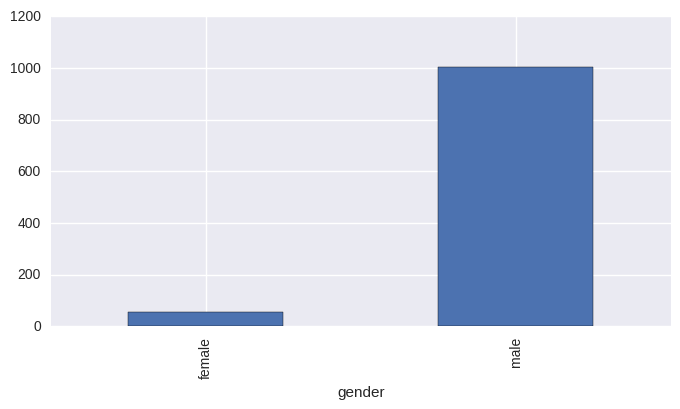

In [223]:
by_gender.size().plot(kind='bar')

In [224]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']] #get a group by a category and gender key

,name,year
129,Maria Goeppert-Mayer,1963
643,Marie Skłodowska-Curie,1903
888,Maria Goeppert-Mayer *,1963
900,Marie Curie,1903


In [225]:
by_cat_gen.size()

category                gender
                        male        7
Chemistry               female      5
                        male      212
Economics               female      1
                        male       92
Literature              female     16
                        male      114
Peace                   female     16
                        male      100
Physics                 female      4
                        male      237
Physiology or Medicine  female     15
                        male      241
dtype: int64

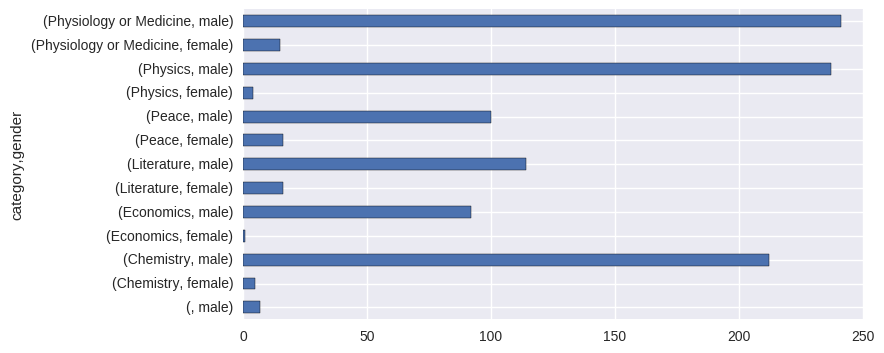

In [226]:
by_cat_gen.size().plot(kind='barh')

gender      female   male
category                 
               NaN    7.0
Chemistry      5.0  212.0
Economics      1.0   92.0
Literature    16.0  114.0
Peace         16.0  100.0


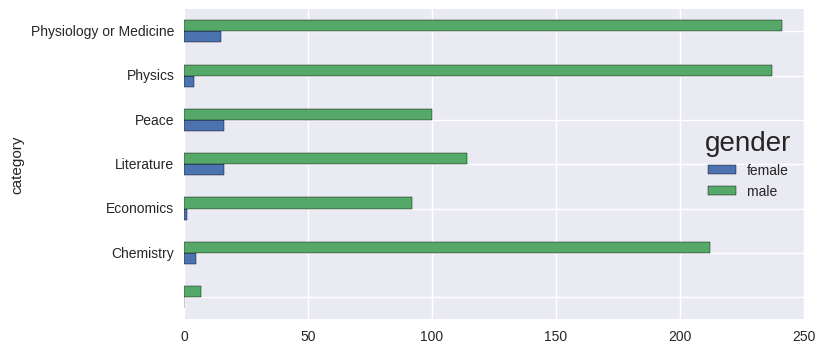

In [227]:
print(by_cat_gen.size().unstack().head())
by_cat_gen.size().unstack().plot(kind='barh')

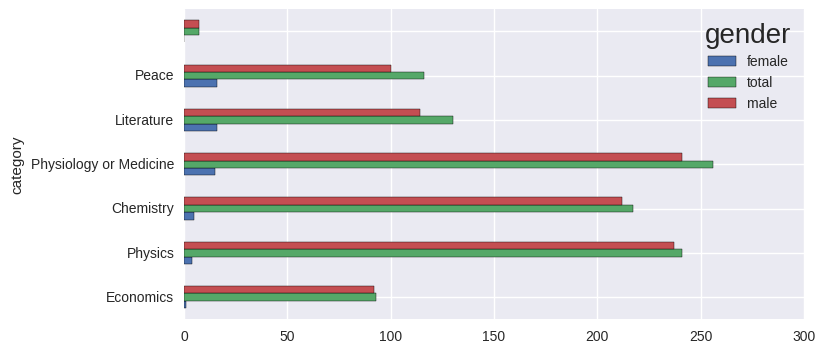

In [228]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

In [229]:
df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

,name,country,year
129,Maria Goeppert-Mayer,United States,1963
643,Marie Skłodowska-Curie,Poland,1903
888,Maria Goeppert-Mayer *,,1963
900,Marie Curie,France,1903


## Function to reduce the number of x-ticks

In [230]:
# Reducing the number of x axis ticks
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    #print('debug: thin_xticks: ticklabels = {}'.format(ticklabels)) #debug
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()


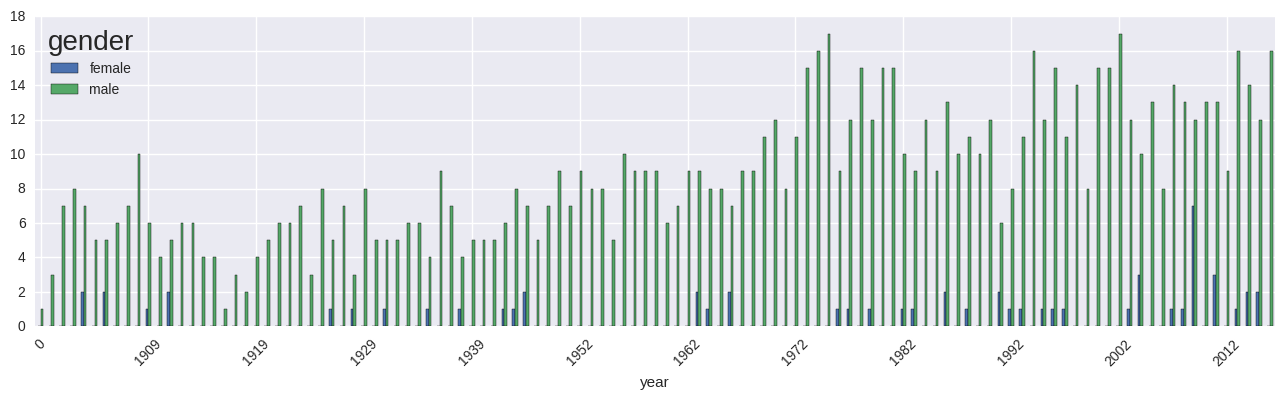

In [231]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
ax = year_gen_sz.plot(kind='bar', figsize=(16,4))
thin_xticks(ax)

In [139]:
# the current unstacked group sizes use an automatic year index
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,6.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
1906,NaN,6.0
1907,NaN,5.0
1908,NaN,8.0
1909,1.0,6.0


In [140]:
# However, there are some gap years where no prize was given and those
# gaps aren't in the dataframe right now.  Create a new index to make sure
# the gap years are represented:
new_index = pd.Index(np.arange(1901, 2016), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

year_gen_sz.loc[1935:1945, :] # now it has the gap years 1940, 41, 42


gender,female,male
year,,
1935,1.0,4.0
1936,NaN,6.0
1937,NaN,7.0
1938,1.0,3.0
1939,NaN,4.0
1940,NaN,NaN
1941,NaN,NaN
1942,NaN,NaN
1943,NaN,4.0


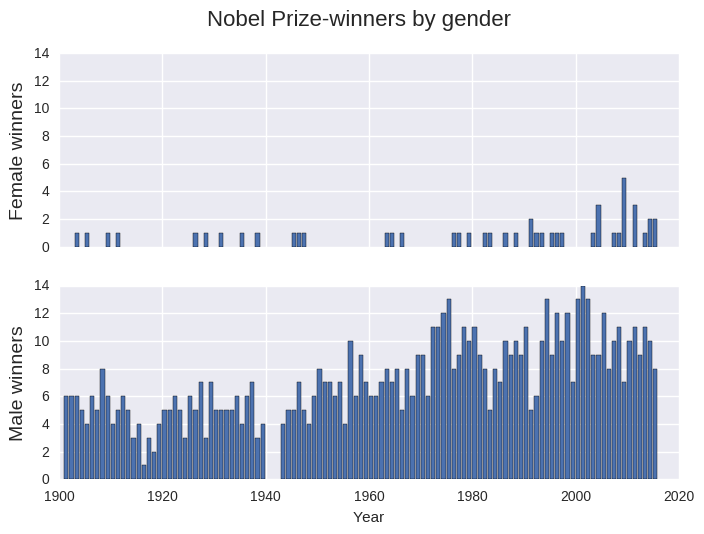

In [141]:
# Another problem with plot above is there are too many bars.
# have dedicated male and female plots but stacked so as to allow
# easy comparisons:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners', fontsize=14)
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners', fontsize=14)
ax_m.set_xlabel('Year')

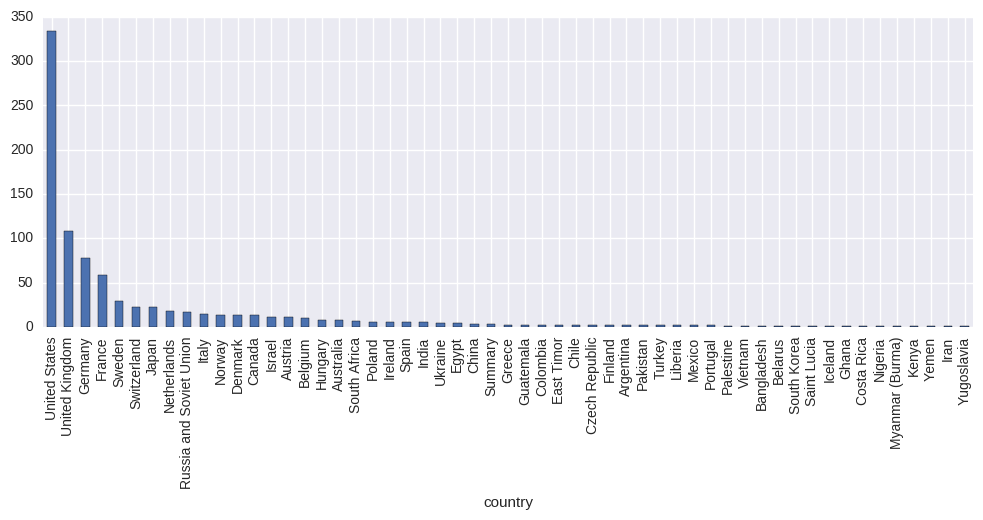

In [142]:
# Let's look at national trends.  Start with simple histogram
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))

In [143]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index([u'Argentina', u'Australia', u'Austria', u'Bangladesh', u'Belarus',
       u'Belgium', u'Canada', u'Chile', u'China', u'Colombia', u'Costa Rica',
       u'Czech Republic', u'Denmark', u'East Timor', u'Egypt', u'Finland',
       u'France', u'Germany', u'Ghana', u'Greece', u'Guatemala', u'Hungary',
       u'Iceland', u'India', u'Iran', u'Ireland', u'Israel', u'Italy',
       u'Japan', u'Kenya', u'Liberia', u'Mexico', u'Myanmar (Burma)',
       u'Netherlands', u'Nigeria', u'Norway', u'Pakistan', u'Palestine',
       u'Poland', u'Portugal', u'Russia and Soviet Union', u'Saint Lucia',
       u'South Africa', u'South Korea', u'Spain', u'Summary', u'Sweden',
       u'Switzerland', u'Turkey', u'Ukraine', u'United Kingdom',
       u'United States', u'Vietnam', u'Yemen', u'Yugoslavia'],
      dtype='object', name=u'country')

In [144]:
# Read in our countries data
if True:
    df_countries = pd.read_json('data/country_data.json', orient='record')
else:
    df_countries = mongo_to_dataframe('nobel_prize', 'countries')

In [145]:
df_countries.iloc[0] # show the first row by position

alpha2Code                                                       AF
alpha3Code                                                      AFG
altSpellings                                       [AF, Afġānistān]
area                                                         652230
borders                              [IRN, PAK, TKM, UZB, TJK, CHN]
callingCodes                                                   [93]
capital                                                       Kabul
currencies                                                    [AFN]
demonym                                                      Afghan
gini                                                           27.8
languages                                              [ps, uz, tk]
latlng                                                 [33.0, 65.0]
name                                                    Afghanistan
nativeName                                                افغانستان
numericCode                                     

In [146]:
# set the index to 'name'.  Then you can add the 'ngsz' Series
# that we created above which also has country name as index and
# it will match them up appropriately
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] =\
df_countries.nobel_wins / df_countries.population

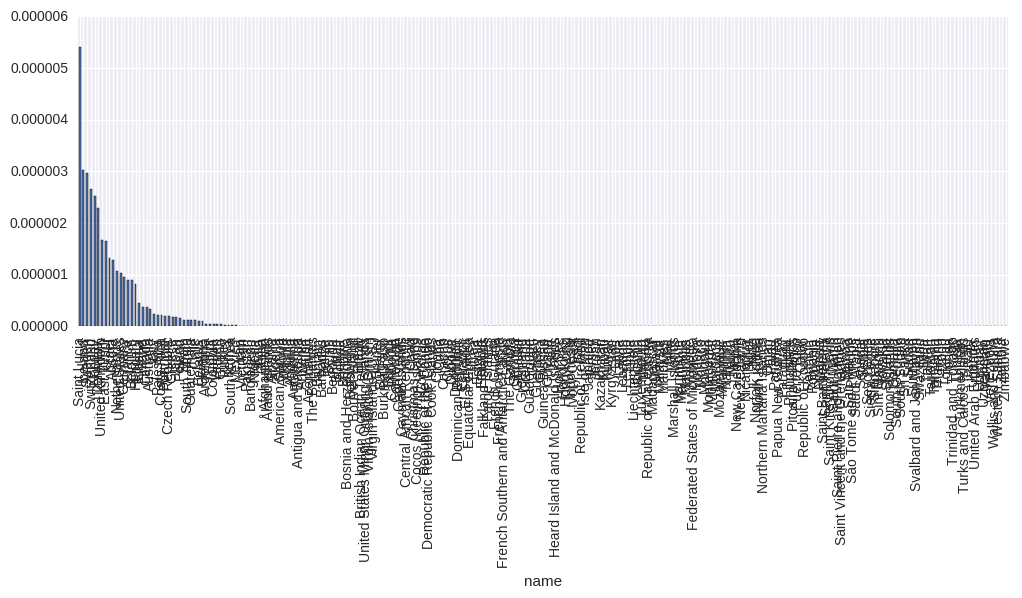

In [147]:
df_countries.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar', figsize=(12,4))

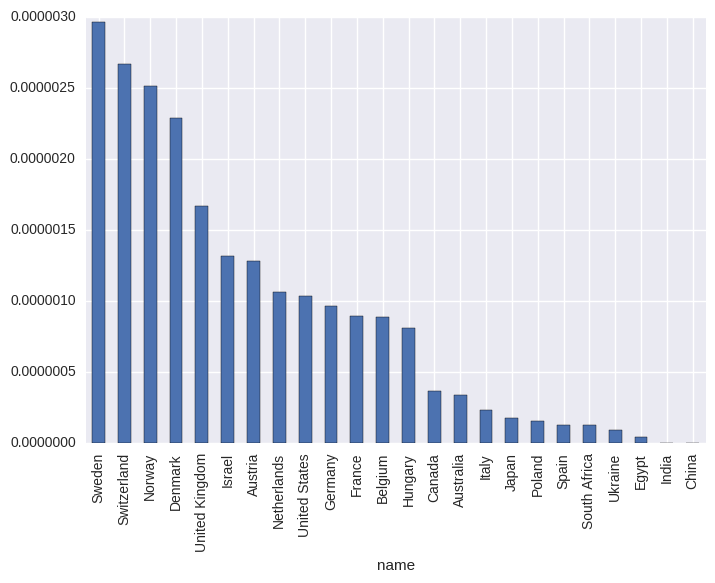

In [148]:
# filter for countries with more than two Nobel prizes
df_countries[df_countries.nobel_wins > 2]\
.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar')

In [149]:
# Now lets look at  wins by category
nat_cat_sz = df.loc[:2015,:].groupby(['country', 'category']).size().unstack()
nat_cat_sz[:5] # take the first five countries by category

# DAY TODO why doesn't this table match the book?  
# book shows Argentina having 2 Chemistry prizes, for example.

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,NaN,NaN,NaN,1.0,NaN,1.0
Australia,NaN,NaN,1.0,NaN,1.0,6.0
Austria,2.0,NaN,1.0,2.0,3.0,3.0
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,1.0,NaN,NaN,NaN


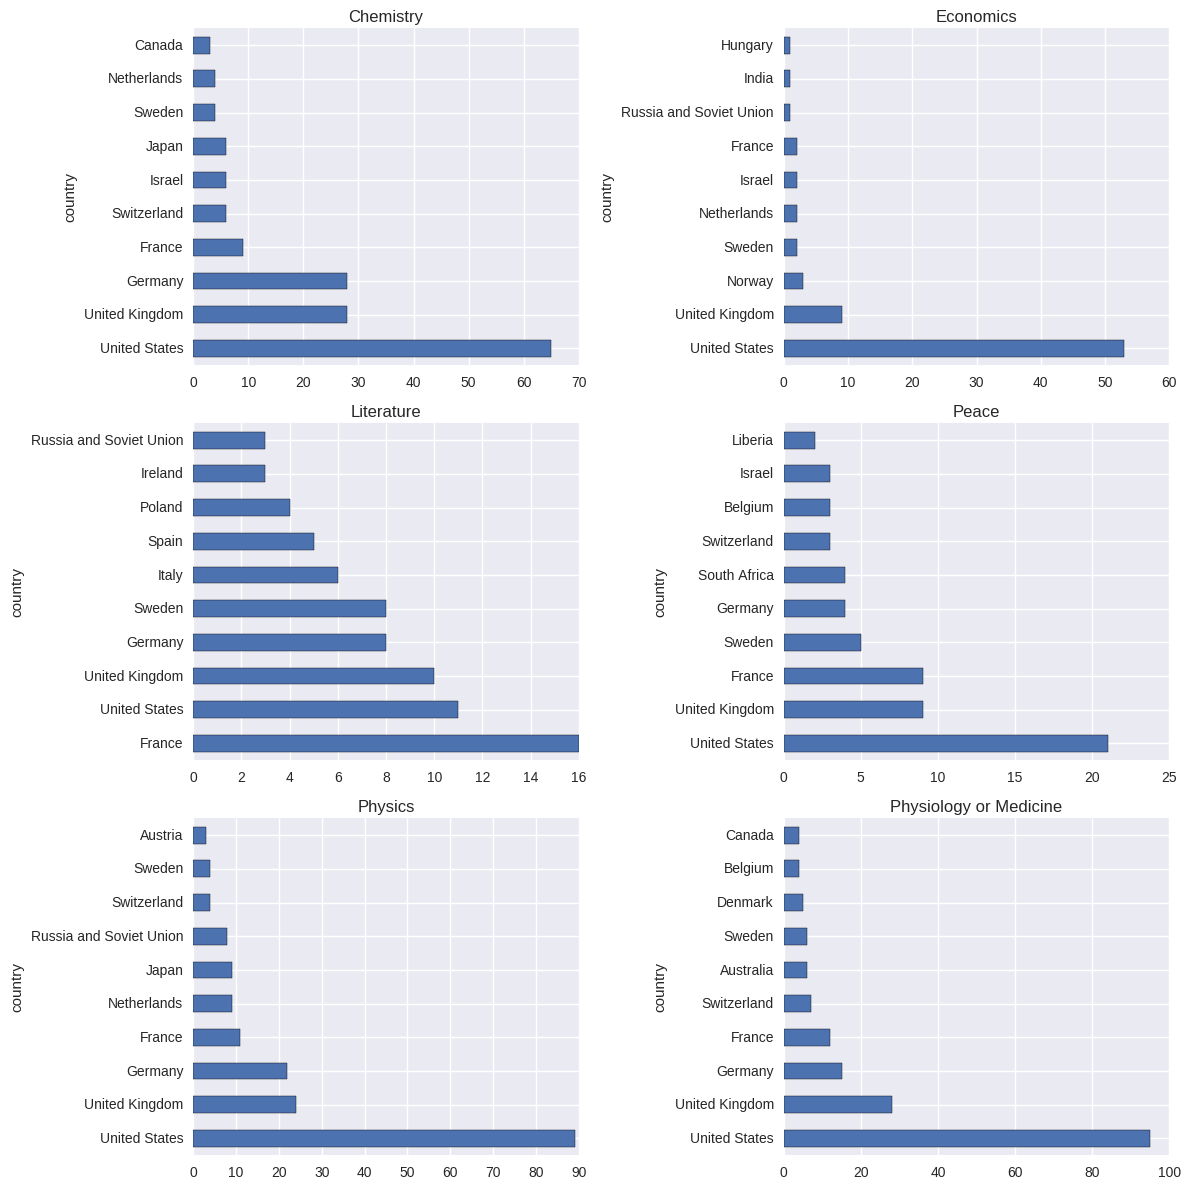

In [151]:
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
    ax = axes[i/COL_NUM, i%COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
plt.tight_layout()

# Historical Trends in Prize Distribution

In [155]:
# increase the font size 
plt.rcParams['font.size'] = 20

In [156]:
new_index = pd.Index(np.arange(1901, 2016), name='year') #fills in the gap years
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index)

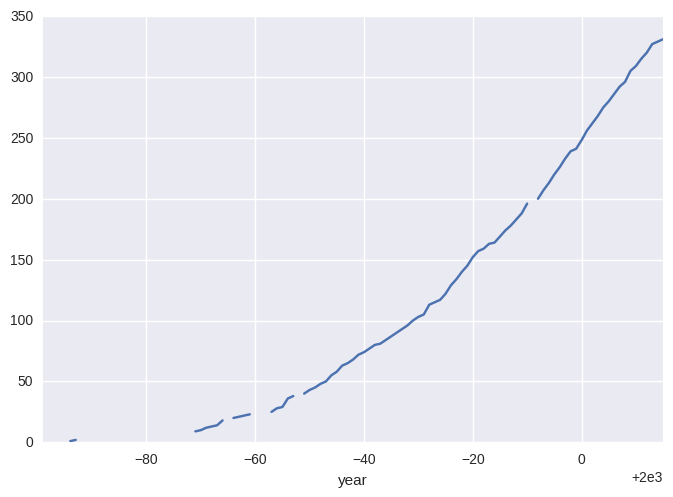

In [157]:
by_year_nat_sz['United States'].cumsum().plot()

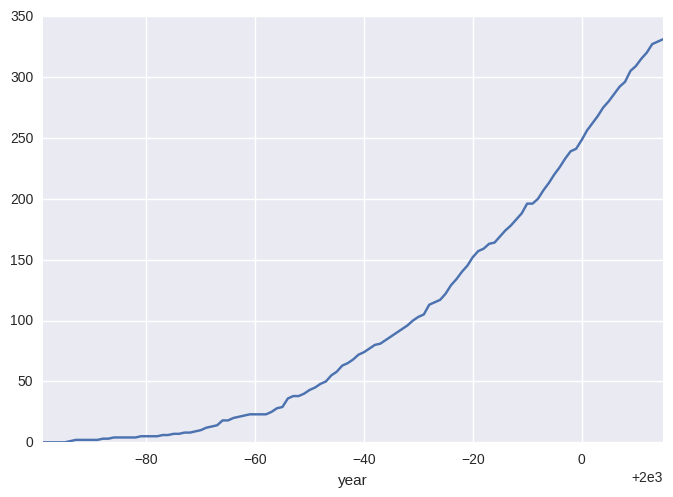

In [158]:
# for years where the US won no prize, cumsum() returns NaN
# let's replace those NaN with zeros
by_year_nat_sz['United States'].fillna(0).cumsum().plot()

[u'Argentina', u'Australia', u'Austria', u'Bangladesh', u'Belarus', u'Belgium', u'Canada', u'Chile', u'China', u'Colombia', u'Costa Rica', u'Czech Republic', u'Denmark', u'East Timor', u'Egypt', u'Finland', u'France', u'Germany', u'Ghana', u'Greece', u'Guatemala', u'Hungary', u'Iceland', u'India', u'Iran', u'Ireland', u'Israel', u'Italy', u'Japan', u'Kenya', u'Liberia', u'Mexico', u'Myanmar (Burma)', u'Netherlands', u'Nigeria', u'Norway', u'Pakistan', u'Palestine', u'Poland', u'Portugal', u'Russia and Soviet Union', u'Saint Lucia', u'South Africa', u'South Korea', u'Spain', u'Summary', u'Sweden', u'Switzerland', u'Turkey', u'Ukraine', u'United Kingdom', u'Vietnam', u'Yemen', u'Yugoslavia']


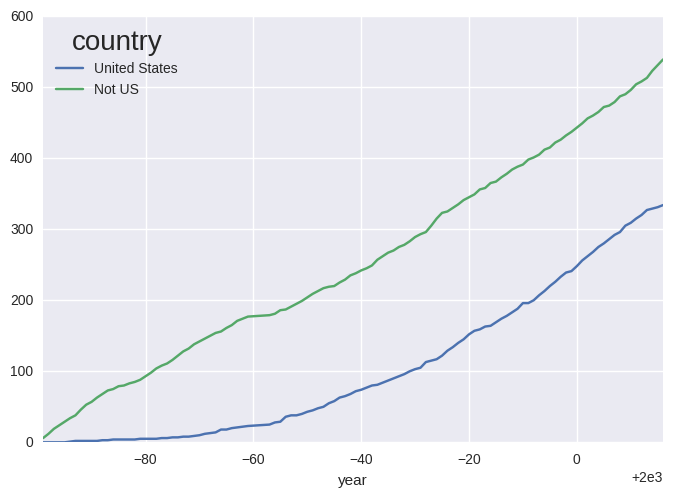

In [166]:
# Compare the US to the rest of the world
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist() # get list of country column names
not_US.remove('United States') #remove "United States" from list of names
print(not_US)
# now use not_US column name list to create a 'Not US' column with
# sum of all prizes for countries not in the not_US list.
by_year_nat_sz['Not US'] = by_year_nat_sz.loc[:,not_US].sum(axis=1)
ax = by_year_nat_sz.loc[:,['United States', 'Not US']].cumsum().plot()

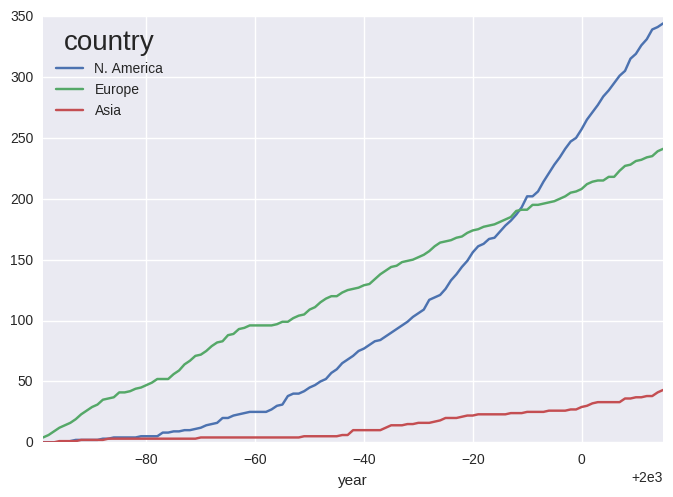

In [168]:
# Look at regional differences
new_index = pd.Index(np.arange(1901, 2016), name='year') #fills in the gap years
by_year_nat_sz = df.groupby(['year', 'country'])\
                    .size().unstack().reindex(new_index).fillna(0)
    
# Create a region column with 2 or 3 largest countries in each region
regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia and Soviet Union', 'India']}
]
for region in regions:
    by_year_nat_sz[region['label']] =\
    by_year_nat_sz.loc[:,region['countries']].sum(axis=1)
    
by_year_nat_sz.loc[:,[r['label'] for r in regions]].cumsum().plot()

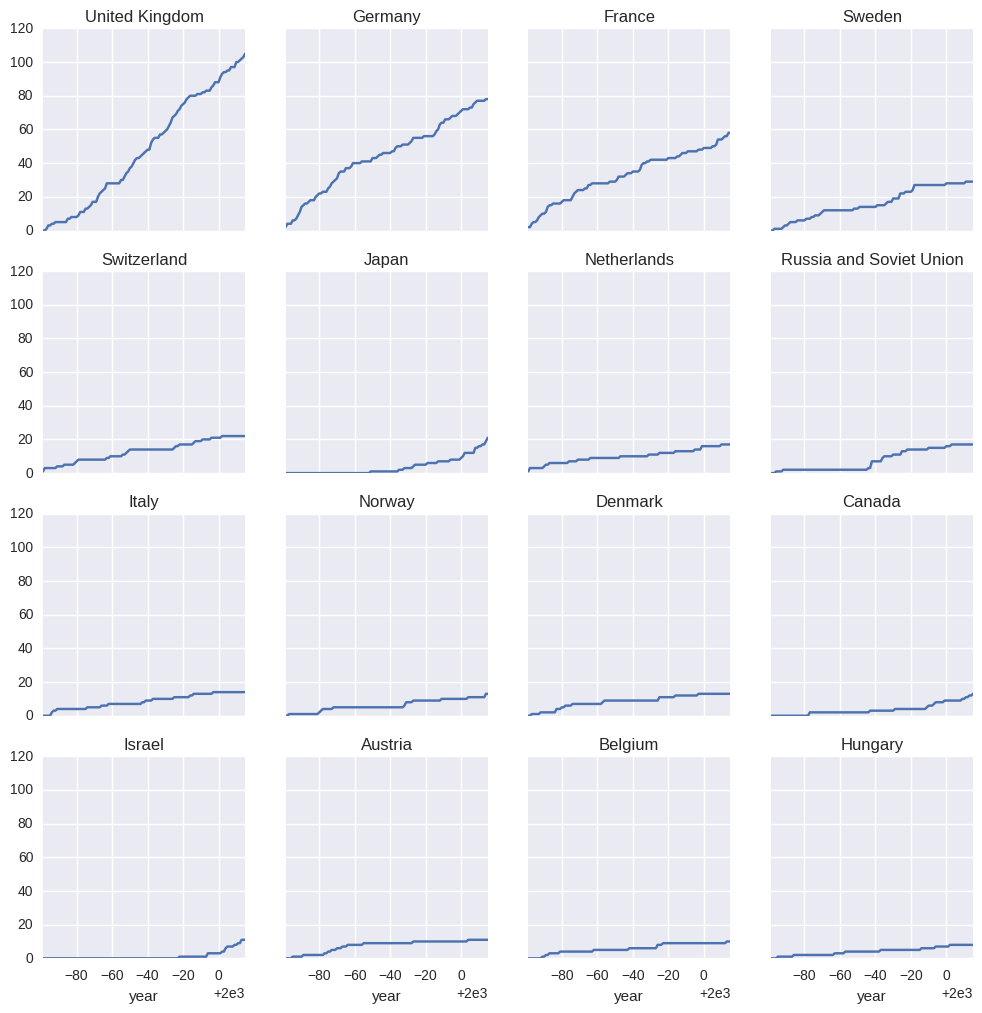

In [170]:
COL_NUM = 4 
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True) #sort countries from highest to lowest win haul
fig, axes = plt.subplots(COL_NUM, ROW_NUM, sharex=True, sharey=True, figsize=(12,12))
for i, nat in enumerate(by_nat_sz.index[1:17]): # enumerate from 2nd row (1) excluding the US (0)
    ax = axes[i/COL_NUM, i%ROW_NUM]
    by_year_nat_sz.loc[:,nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

In [173]:
import seaborn as sns
plt.style.use('seaborn')

See list of [colormaps here](https://matplotlib.org/users/colormaps.html#overview)
You can also apppend "_r" to any of these to reverse them.

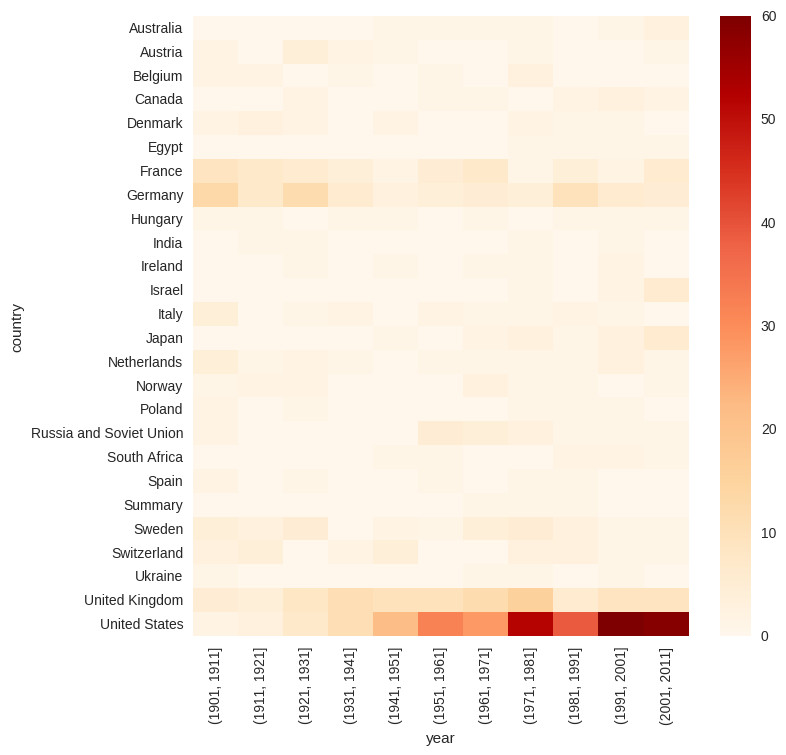

In [186]:
# create categorical buckets out of the continuous year
bins = np.arange(df.year.min(), df.year.max(), 10)
by_year_nat_binned = df.groupby(
        ['country', pd.cut(df.year, bins, precision=0)]).size().unstack().fillna(0)
plt.figure(figsize=(8,8))
#sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2], cmap="YlGnBu")
#sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2], cmap="gist_earth_r")
#sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2], cmap="RdBu_r")
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2], cmap="OrRd")


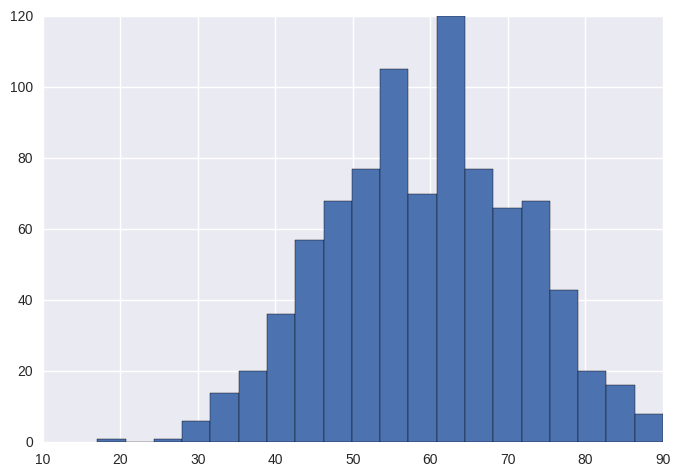

In [187]:
df['award_age'].hist(bins=20)

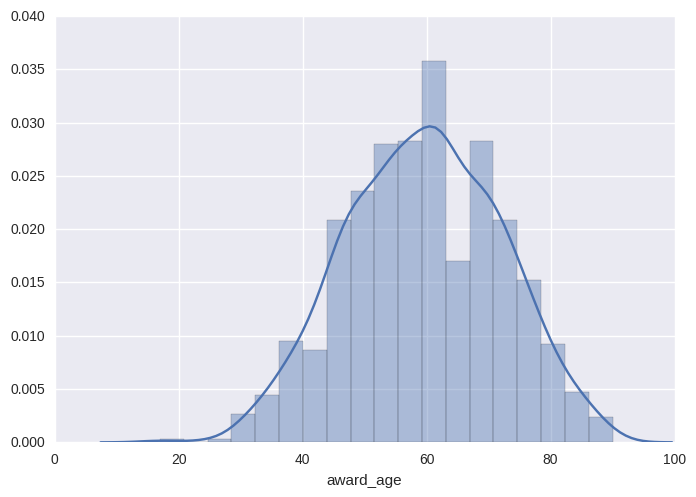

In [188]:
sns.distplot(df['award_age'])

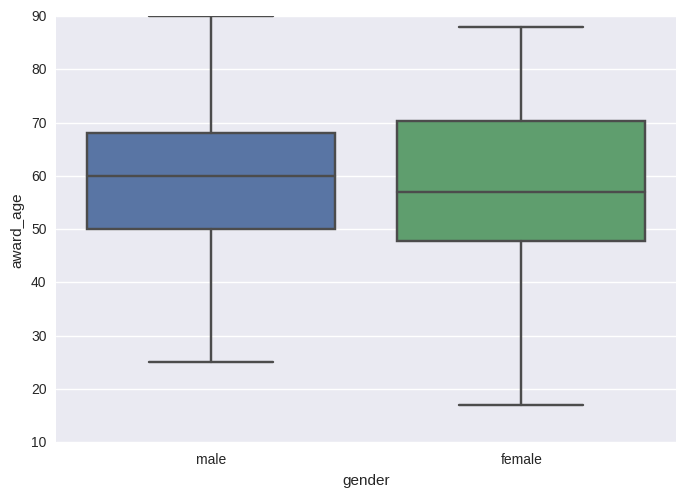

In [189]:
sns.boxplot(df.gender, df.award_age)

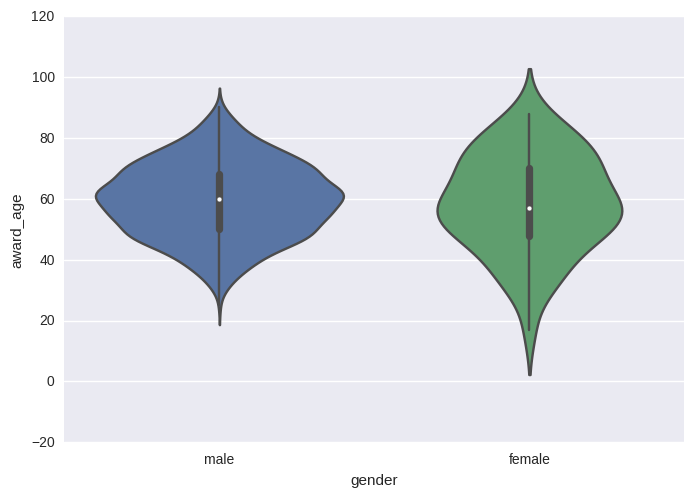

In [190]:
sns.violinplot(df.gender, df.award_age)

In [197]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth).dt.days/365

In [200]:
df.date_of_birth



0     1969-12-31 23:15:36.028800
1     1969-12-31 23:19:52.464000
2     1969-12-31 23:43:18.537600
3     1969-12-31 23:29:24.432000
4     1969-12-31 23:23:17.145600
5     1969-12-31 23:54:13.536000
6     1969-12-31 23:10:43.305600
7     1969-12-31 23:03:25.430400
8     1969-12-31 23:06:50.803200
9     1969-12-31 23:01:15.312000
10    1969-12-31 23:08:46.838400
11    1969-12-31 23:12:32.601600
12    1969-12-31 23:03:39.340800
13    1969-12-31 23:04:15.974400
14    1969-12-31 22:55:25.824000
15    1969-12-31 22:58:50.160000
16    1969-12-31 22:46:28.329600
17    1969-12-31 22:57:06.652800
18    1969-12-31 23:17:47.702400
19    1969-12-31 23:07:08.083200
20    1969-12-31 23:24:11.750400
21    1969-12-31 23:14:38.745600
22    1969-12-31 23:09:51.120000
23    1969-12-31 23:15:10.627200
24    1969-12-31 23:13:29.366400
25    1969-12-31 23:10:15.571200
26    1969-12-31 23:11:04.646400
27    1969-12-31 23:01:12.633600
28    1969-12-31 23:11:18.556800
29    1969-12-31 23:11:47.932800
          

LinAlgError: singular matrix

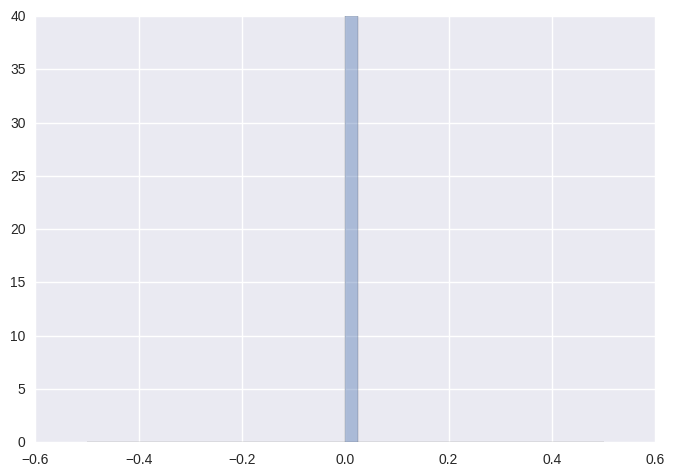

In [194]:
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

In [44]:
df[df.age_at_death > 100][['name', 'category', 'year']]

                     name                category  year
101          Ronald Coase               Economics  1991
329  Rita Levi-Montalcini  Physiology or Medicine  1986

In [45]:
df_temp = df[df.age_at_death.notnull()]

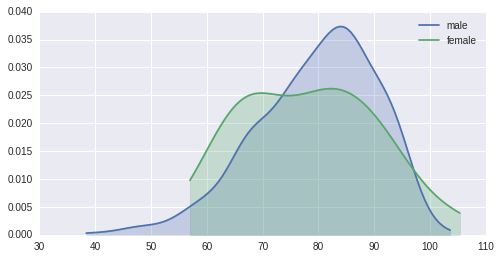

In [46]:
sns.kdeplot(df_temp[(df_temp.gender == 'male')].age_at_death, shade=True, label='male')
sns.kdeplot(df_temp[(df_temp.gender == 'female')].age_at_death, shade=True, label='female')
plt.legend()

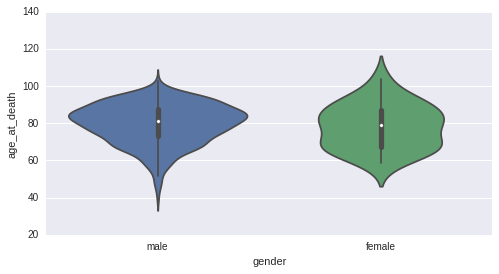

In [98]:
sns.violinplot(df.gender, age_at_death)

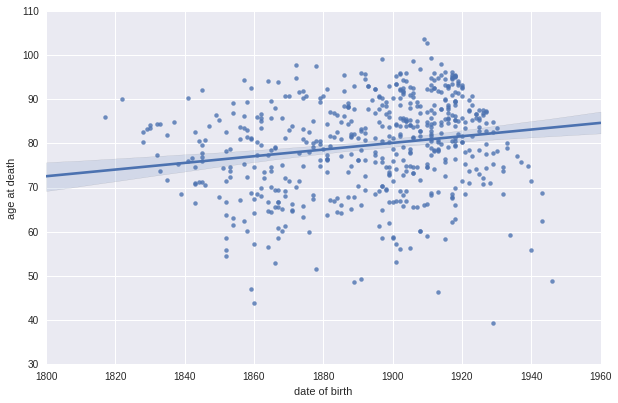

In [48]:
df_temp=df[df.age_at_death.notnull()]
data = pd.DataFrame(
{'age at death':df_temp.age_at_death,
'date of birth':df_temp.date_of_birth.dt.year})
sns.lmplot('date of birth', 'age at death', data, size=6, aspect=1.5)

In [49]:
df = pd.read_json('data/nobel_winners_plus_bornin.json', orient='records')

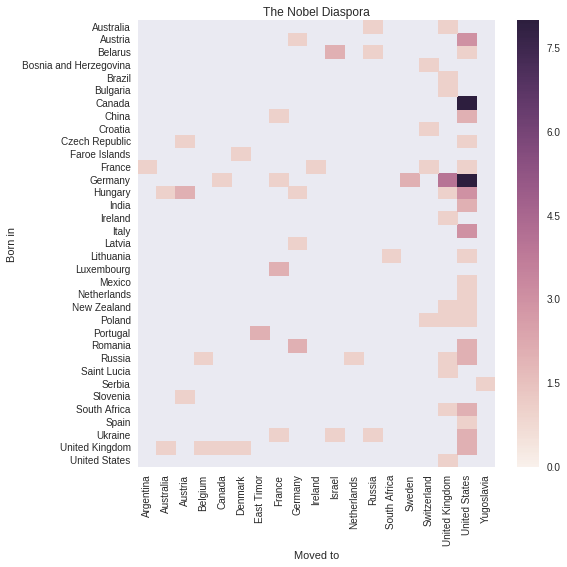

In [50]:
by_bornin_nat = df[df.born_in.notnull()].groupby(\
['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(8,8))
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8)
ax.set_title('The Nobel Diaspora')

In [51]:
df.date_of_birth = pd.to_datetime(df.date_of_birth).dt.date

In [52]:
df[(df.born_in == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category']]

                  name date_of_birth                category
119  Ernst Boris Chain    1906-06-19  Physiology or Medicine
484   Hans Adolf Krebs    1900-08-25  Physiology or Medicine
486           Max Born    1882-12-11                 Physics
503       Bernard Katz    1911-03-26  Physiology or Medicine